# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [0]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [0]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [0]:
sampleTrainNum=60000
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=sampleTrainNum)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

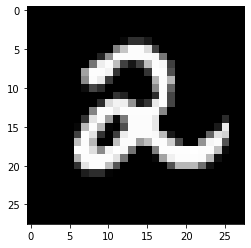

In [5]:
# The rest of columns are pixels
pixels = X_train[0]
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.imshow(pixels, cmap='gray')
plt.show()

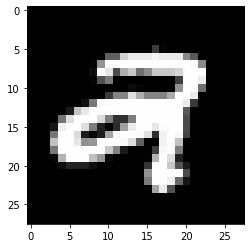

In [6]:
# The rest of columns are pixels
pixels = X_train[42]
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.imshow(pixels, cmap='gray')
plt.show()

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,  roc_curve, auc

In [8]:
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
slm = linear_model.SGDClassifier(loss='log')
slm.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_predNaiveBayes = naiveBayes.predict(X_train)
y_predSml = slm.predict(X_train)
y_predRf = rf.predict(X_train)

In [12]:
print("Naive Bayes Accuracy:", accuracy_score(y_train, y_predNaiveBayes))
confusion_matrix(y_train, y_predNaiveBayes)

Naive Bayes Accuracy: 0.5573666666666667


array([[5257,   10,   35,   18,   10,   13,  223,    4,  256,  139],
       [   2, 6418,   14,   25,    1,    8,   82,    2,  160,   73],
       [ 488,  156, 1838,  403,   21,   36, 1518,   16, 1404,  100],
       [ 294,  320,   51, 2189,    9,   16,  342,   50, 2173,  661],
       [ 161,   38,   55,   35,  775,   45,  595,   40, 1248, 2864],
       [ 562,  139,   31,  120,   17,  272,  316,    9, 3306,  591],
       [  46,  103,   31,    2,    4,   18, 5509,    0,  118,    8],
       [  22,   48,   11,   55,   36,    5,   23, 1938,  187, 3961],
       [  85,  731,   28,   48,   18,   39,  111,   10, 3608, 1178],
       [  32,   36,   16,   10,   32,    5,    4,   85,  107, 5638]])

In [13]:
print("Simple linear model Accuracy:", accuracy_score(y_train, y_predSml))
confusion_matrix(y_train, y_predSml)

Simple linear model Accuracy: 0.86145


array([[5739,    0,   37,   44,   49,    5,   39,    1,   50,    1],
       [   2, 6594,   61,   62,   13,    3,    7,    1,   33,    9],
       [  15,   36, 5349,  305,  136,    4,   42,   11,   73,    9],
       [  10,   14,  172, 5729,   26,   33,   21,   13,   57,   30],
       [   4,   16,   31,   18, 5702,    2,   24,    1,   27,   31],
       [  61,   10,  114,  760,  233, 3679,  196,    5,  266,   39],
       [  27,    9,   51,   21,   53,   30, 5605,    0,   41,    2],
       [  19,   18,  267,  375,  249,   10,    7, 4926,   67,  348],
       [  35,   76,  406,  878,  117,  150,   43,    4, 4076,   71],
       [  26,   16,   56,  449,  972,   39,    0,   52,   67, 4288]])

In [14]:
print("Random Forest Accuracy:", accuracy_score(y_train, y_predRf))
confusion_matrix(y_train, y_predRf)

Random Forest Accuracy: 1.0


array([[5965,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6785,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5980,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6105,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5856,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5363,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5839,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6286,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5856,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5965]])

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [15]:
y_predNaiveBayesTest = naiveBayes.predict(X_test)
y_predSmlTest = slm.predict(X_test)
y_predRfTest = rf.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_predNaiveBayesTest))
print("Simple linear model Accuracy:", accuracy_score(y_test, y_predSmlTest))
print("Random Forest Accuracy:", accuracy_score(y_test, y_predRfTest))

Naive Bayes Accuracy: 0.5559
Simple linear model Accuracy: 0.8504
Random Forest Accuracy: 0.9701


In [16]:
print("Naive Bayes F-Measure:", f1_score(y_test, y_predNaiveBayesTest,average=None))
print("Simple linear model F-Measure:", f1_score(y_test, y_predSmlTest,average=None))
print("Random Forest F-Measure:", f1_score(y_test, y_predRfTest,average=None))

Naive Bayes F-Measure: [0.80019212 0.85822465 0.44362018 0.49706458 0.27154047 0.08275862
 0.76687598 0.45190157 0.38894309 0.53793884]
Simple linear model F-Measure: [0.95897709 0.96032832 0.83175803 0.76663994 0.85013624 0.77885784
 0.93543759 0.86218302 0.75608376 0.78888889]
Random Forest F-Measure: [0.98306878 0.98170174 0.96847291 0.95821186 0.97578568 0.96668429
 0.97739298 0.97066136 0.95813953 0.96008085]


In [0]:
naiveBayes5 = y_predNaiveBayesTest.astype(int)==5
slm5 = y_predSmlTest.astype(int)==5
rf5 = y_predRfTest.astype(int)==5

five = y_test=='5'

naiveBayes_fpr, naiveBayes_tpr, _ = roc_curve(five, naiveBayes5)
slm_fpr, slm_tpr, _ = roc_curve(five, slm5)
rf_fpr, rf_tpr, _ = roc_curve(five, rf5)

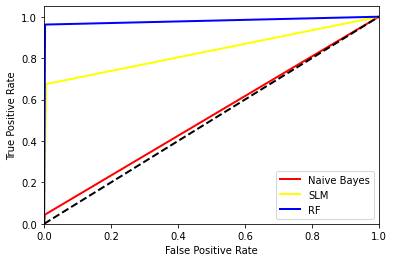

In [19]:
lw = 2
plt.plot(naiveBayes_fpr, naiveBayes_tpr, color='red',
         lw=lw, label='Naive Bayes')
plt.plot(slm_fpr, slm_tpr, color='yellow',
         lw=lw, label='SLM' )
plt.plot(rf_fpr, rf_tpr, color='blue',
         lw=lw, label='RF')
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()